In [4]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import time

In [5]:
def setting_data(data=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [6]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [7]:
def plynomial_features_generation(data=None, degree=0):
    return np.hstack((data,np.power(data,np.arange(start=2,stop=degree+1))))

In [8]:
def normalize_data(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        data[:,i] = np.divide(np.subtract(data[:,i],np.mean(data[:,i])), np.std(data[:,i])).astype(float)
    return data

In [72]:
def gradient_descent(x=None,y=None,tolerance_gradient=0.01, tolerance_cost=0.0000001,
                     alpha = 0.001, max_iter=10000,l2_regularization=0):
   
    feature_matrix = setting_data(data=x)
    
    weights = np.random.rand(x.shape[1] + 1, 1)
    partials = np.zeros(x.shape[1]+1).reshape((-1,1))
    
    i = 0
    prev_cost = 10
    costs = []
    gradients = []
    
    converged = False
    while not converged:
        i += 1
        
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, y)
        #Updating weights
        
        #taking derivative
        partials = np.dot(feature_matrix.T,errors)
        #This is the total change :p
#         step_size = np.multiply(alpha,partials)
#         weights_regularized = np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization)))
        
        weights = np.subtract(np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization))),
                              np.multiply(alpha,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
#         gradients = np.append(gradients,gradient_magnitude)
#         costs = np.append(costs,cur_cost)
        gradients.append(gradient_magnitude)
        costs.append(cur_cost)

#         if i%1000==0:
#             print(cur_cost)
#         print(abs(cur_cost - prev_cost))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost):
            if gradient_magnitude <= tolerance_gradient:
                print('[Gradient Magnitude - Tolerance] Satisfied')
            else:
                print('[Cost Tolerance - Precision] Satisfied')
            converged = True

        if i >= max_iter:
            print('Iterations Completed')
            converged = True
        
        prev_cost = cur_cost
    return (i, np.array(weights),np.array(gradients), costs)

In [11]:
house_data = pd.read_csv('Related Datasets/kc_house_data.csv')
house_test_data = pd.read_csv('Related Datasets/kc_house_test_data.csv')
house_train_data = pd.read_csv('Related Datasets/kc_house_train_data.csv')


In [19]:
x = np.arange(-10, 11).reshape(-1,1)
y = (10 + 2*x + 5*x**2).astype(float).reshape(-1,1)

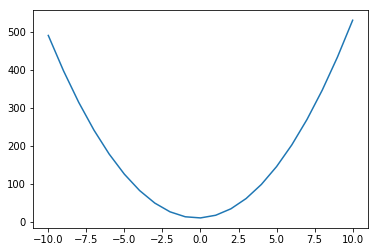

In [20]:
plt.plot(x, y)
plt.show()

Generating Polynomial Features

In [21]:
degree = 2
x_poly = plynomial_features_generation(x,degree)

In [22]:
x_norm = normalize_data(x_poly)
y_norm = (10 + 2*x_norm[:,0] + 5*x_norm[:,1]**2).reshape(-1,1)

In [73]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_poly, y=y,alpha=1e-5,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [74]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  3.5946316719055176
Iterations:  76710
Calculated weights:
 [[9.99239573]
 [2.        ]
 [5.00011559]]


Orignal weights were: 10    2    5

In [ ]:
np.multiply(w,1-2*ss*l2)

In [61]:
w = np.array([1,2,3]).reshape(-1,1)
ss = 2
l2 = 10

In [62]:
np.multiply(w,1-2*ss*l2)

array([[ -39],
       [ -78],
       [-117]])

In [64]:
w = np.vstack((w[0],np.multiply(w[1:],1-2*ss*l2)))
w

array([[   1],
       [ -78],
       [-117]])

In [59]:
w[0]

array([1])